In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
ss = pd.read_csv('gender_submission.csv')

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [12]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [13]:
test.info()
test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


(418, 11)

In [14]:
train.info()
train.shape
#age and cabin have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

In [15]:
train_num = train[['Survived','Pclass','Age','SibSp','Parch','Fare']]
train_cat = train[['Sex','Cabin','Embarked']]
print(train_num.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


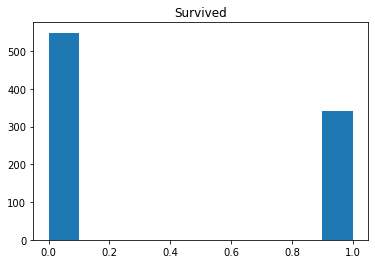

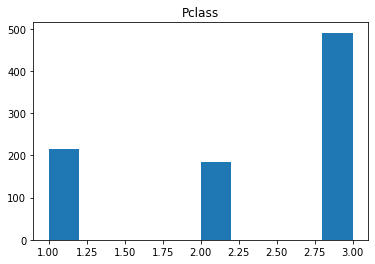

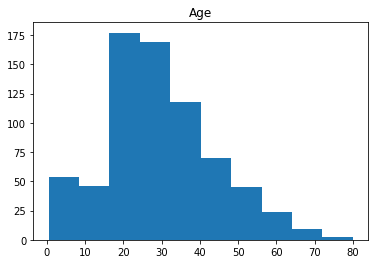

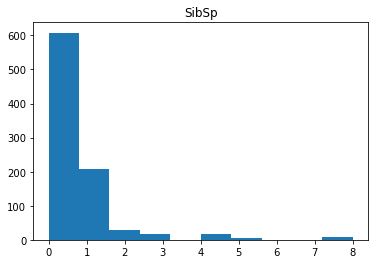

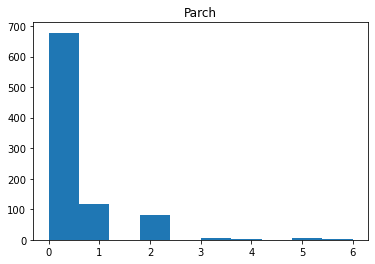

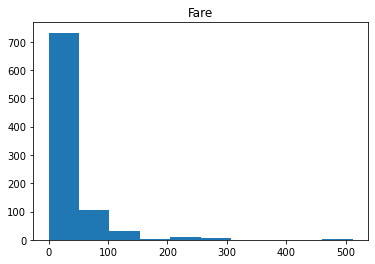

In [16]:
for i in train_num.columns:
    plt.hist(train_num[i])
    plt.title(i)
    plt.show()

In [17]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [18]:
ss.shape

(418, 2)

In [19]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

so we can see that cabin,age,and embarked have null values in train set while age,cabin,fare have null values in test set

**EDA**

In [21]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:
train[['Sex','Survived']].groupby('Sex').mean().sort_values(by='Survived')

,Survived
Sex,
male,0.188908
female,0.742038


Although there were more male passengers than female, the majority passengers survived was female

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

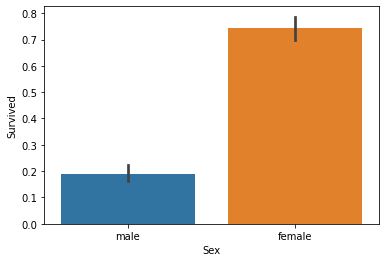

In [23]:
sns.barplot(x='Sex',y='Survived',data=train)

In [24]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [25]:
train[['Pclass','Survived']].groupby('Pclass').mean().sort_values(by='Survived')

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

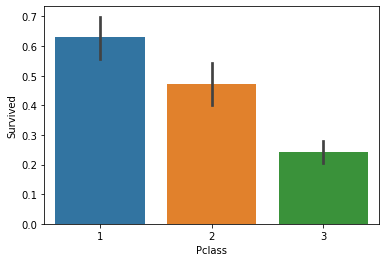

In [26]:
sns.barplot(x='Pclass',y='Survived',data=train)

The people in first class were the given more priority over others hence their survival rate is more as compared to 2nd and 3rd

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

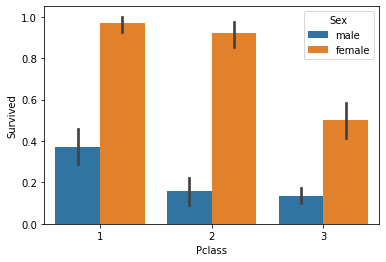

In [27]:
sns.barplot(x='Pclass',y='Survived',data=train,hue='Sex')

In [28]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
train[['Embarked','Survived']].groupby('Embarked').mean().sort_values(by='Survived')

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

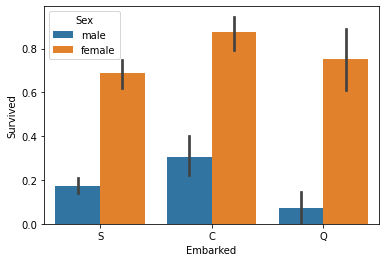

In [30]:
sns.barplot(x='Embarked',y='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

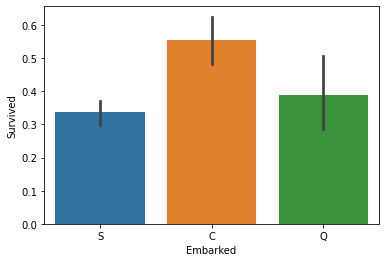

In [31]:
sns.barplot(x='Embarked',y='Survived',data=train)

Most people survived are from class C and Q , least in S

<AxesSubplot:xlabel='Embarked', ylabel='Pclass'>

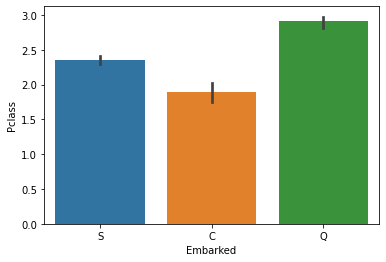

In [32]:
sns.barplot(x='Embarked',y='Pclass',data=train)

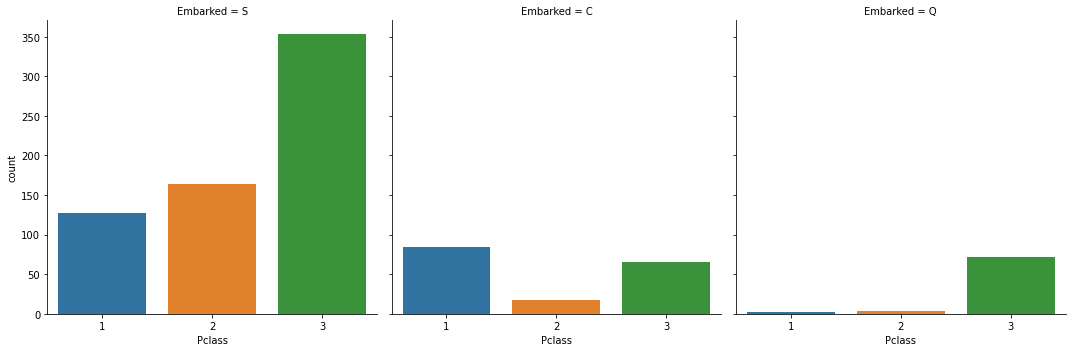

In [33]:
sns.factorplot('Pclass',col='Embarked',data=train,kind='count')

<AxesSubplot:>

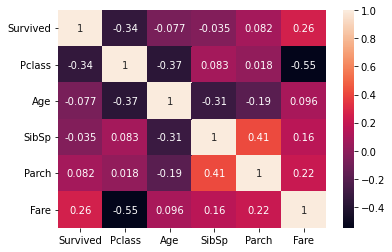

In [34]:
hmap = train_num.corr()
sns.heatmap(hmap,annot = True)

**Numerical Data**

In [35]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [36]:
train[['SibSp','Survived']].groupby('SibSp').mean().sort_values(by='Survived',ascending = False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

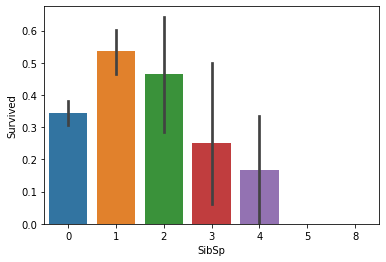

In [37]:
sns.barplot(x='SibSp',y='Survived',data=train)

In [38]:
train['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [39]:
train[['Parch','Survived']].groupby('Parch').mean().sort_values(by='Survived',ascending = False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

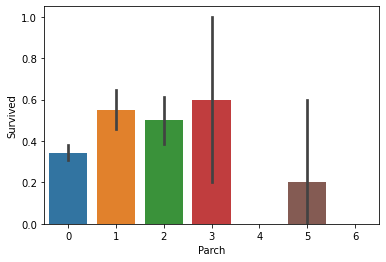

In [40]:
 sns.barplot(x='Parch',y='Survived',data=train)

In [41]:
train['Age'].isnull().sum()

177

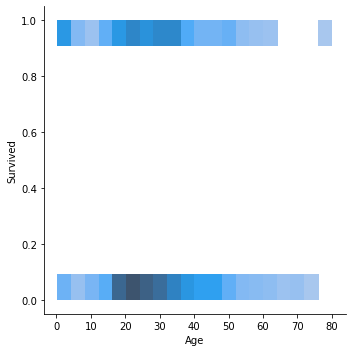

In [42]:
 sns.displot(x='Age',y='Survived',data=train)

<AxesSubplot:xlabel='Age', ylabel='Density'>

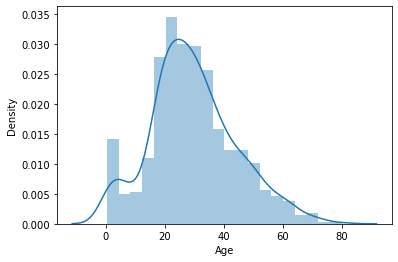

In [43]:
 sns.distplot(train['Age'])

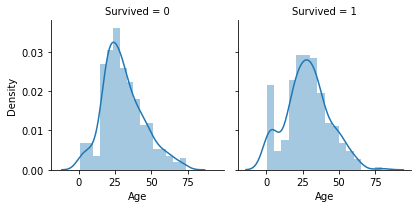

In [44]:
graph = sns.FacetGrid(train,col='Survived')
graph.map(sns.distplot,'Age')

In [45]:
#newtrain = train.drop(['PassengerId','Name','Ticket'],axis=1)
#sns.pairplot(newtrain)

**Fill the missing values**

In [46]:
df = pd.concat([train, test], axis=0).drop_duplicates(keep=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [48]:
df = df.drop(columns=['Cabin','Name','Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S


In [80]:
filltrain_em = df['Embarked'].dropna().mode()[0]
df['Embarked'].fillna(filltrain_em,inplace=True)
filltrain_em

'S'

In [81]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             1
Embarked         0
dtype: int64

In [82]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [83]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,28.0,0,0,8.0500,S
414,1306,NaN,1,female,39.0,0,0,108.9000,C
415,1307,NaN,3,male,38.5,0,0,7.2500,S
416,1308,NaN,3,male,28.0,0,0,8.0500,S


In [84]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,2
1,2,1.0,1,0,38.0,1,0,71.2833,0
2,3,1.0,3,0,26.0,0,0,7.9250,2
3,4,1.0,1,0,35.0,1,0,53.1000,2
4,5,0.0,3,1,35.0,0,0,8.0500,2


In [89]:
tlen = len(train)
telen = len(test)
train = df.iloc[:tlen, :]
test = df.iloc[telen:, :]
print('tlen:\t testlen:',tlen,telen)

tlen:	 testlen: 891 418


In [90]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [91]:
# input split
X = train.drop(columns=['PassengerId', 'Survived'], axis=1)
Y = train['Survived']

In [93]:
print(X,'\n',Y)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    1  22.0      1      0   7.2500         2
1         1    0  38.0      1      0  71.2833         0
2         3    0  26.0      0      0   7.9250         2
3         1    0  35.0      1      0  53.1000         2
4         3    1  35.0      0      0   8.0500         2
..      ...  ...   ...    ...    ...      ...       ...
886       2    1  27.0      0      0  13.0000         2
887       1    0  19.0      0      0  30.0000         2
888       3    0  28.0      1      2  23.4500         2
889       1    1  26.0      0      0  30.0000         0
890       3    1  32.0      0      0   7.7500         1

[891 rows x 7 columns] 
 0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64


In [97]:
def final(model):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    

In [98]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
final(model)

Accuracy: 0.4313405814997726


In [100]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
final(model)

Accuracy: 0.7309417040358744


In [102]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
final(model)

Accuracy: 0.8026905829596412


In [109]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
final(model)
#choosing even no of neighbours as dataset is odd

Accuracy: 0.7219730941704036


In [103]:
df.shape

(1309, 9)

In [110]:
from sklearn.svm import SVC # "Support vector classifier"  
model = SVC(kernel='linear', random_state=0)
final(model)

Accuracy: 0.7847533632286996


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [53]:
#filltrain_em = train['Embarked'].dropna().mode()[0]
#filltrain_em

'S'

In [54]:
#train['Embarked'].fillna(filltrain_em,inplace=True)
#train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [55]:
filltrain_age = train['Age'].dropna().median()
filltrain_age

28.0

In [56]:
train['Age'].fillna(filltrain_age,inplace=True)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [57]:
filltest_fare = train['Fare'].dropna().median()
filltest_fare

14.4542

In [58]:
test['Fare'].fillna(filltest_fare,inplace=True)
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

In [59]:
filltest_age = train['Age'].dropna().median()
filltest_age

28.0

In [60]:
test['Age'].fillna(filltest_age,inplace=True)
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [61]:
combi = pd.concat([train,test]).drop_duplicates(keep=False)
#combi.head()

In [62]:
#combi.isnull().sum()

**Encoding**

In [63]:
#combi.loc[combi['Sex']=='male','Sex']=1
#combi.loc[combi['Sex']=='female','Sex']=0

In [64]:
#combi.head()

In [65]:
#combi.loc[combi['Embarked']=='S','Embarked']=1
#combi.loc[combi['Embarked']=='C','Embarked']=2
#combi.loc[combi['Embarked']=='Q','Embarked']=3
#combi.head()

In [66]:
#train = combi[:len(train)]
#train.head()

In [67]:
#test = combi[:len(test)]
#test.head()

In [68]:
#test = test.drop('Survived',axis=1)
#test.head()

**Modelling**

In [69]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex','Embarked']
le = LabelEncoder()

for col in cols:
    combi[col] = le.fit_transform(combi[col])

combi.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,2
1,2,1.0,1,0,38.0,1,0,71.2833,C85,0
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,2
3,4,1.0,1,0,35.0,1,0,53.1000,C123,2
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,2


In [70]:
train = combi[:len(train)]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,2
1,2,1.0,1,0,38.0,1,0,71.2833,C85,0
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,2
3,4,1.0,1,0,35.0,1,0,53.1000,C123,2
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,2


In [71]:
test = combi[:len(test)]
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,2
1,2,1.0,1,0,38.0,1,0,71.2833,C85,0
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,2
3,4,1.0,1,0,35.0,1,0,53.1000,C123,2
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,2


In [72]:
X = train.drop(['PassengerId','Survived'],axis=1)
Y = train['Survived']

In [73]:
X.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,NaN,2
1,1,0,38.0,1,0,71.2833,C85,0
2,3,0,26.0,0,0,7.9250,NaN,2
3,1,0,35.0,1,0,53.1000,C123,2
4,3,1,35.0,0,0,8.0500,NaN,2


In [74]:
Y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [75]:
#xtest = test.drop('Survived',axis=1)
#ytest = test['Survived']

In [76]:
#xtest.head()

In [77]:
from sklearn.model_selection import train_test_split
def final(model):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0)
    model.fit(x_train,y_train)
    print('accuracy:',model.score(x_test,y_test))

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix
model = LinearRegression()
final(model)



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\pavan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-78-d80bd22ac1c6>", line 4, in <module>
    final(model)
  File "<ipython-input-77-46675d93ec98>", line 4, in final
    model.fit(x_train,y_train)
  File "C:\Users\pavan\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\pavan\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\pavan\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "C:\Users\pavan\anaconda3\lib\sit

TypeError: object of type 'NoneType' has no len()

In [ ]:
xtrain.isna().sum()

In [ ]:
ytrain.isna().sum()

In [ ]:
xtrain.shape

In [ ]:
ytrain.shape